## Medical Insurance Costs Prediction

### Import Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset Upload Part

In [3]:
data = pd.read_csv('insurance.csv')
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
#check duplicates
data.duplicated().sum()

1

In [8]:
# Drop Duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [9]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Perform EDA

<AxesSubplot:xlabel='age', ylabel='charges'>

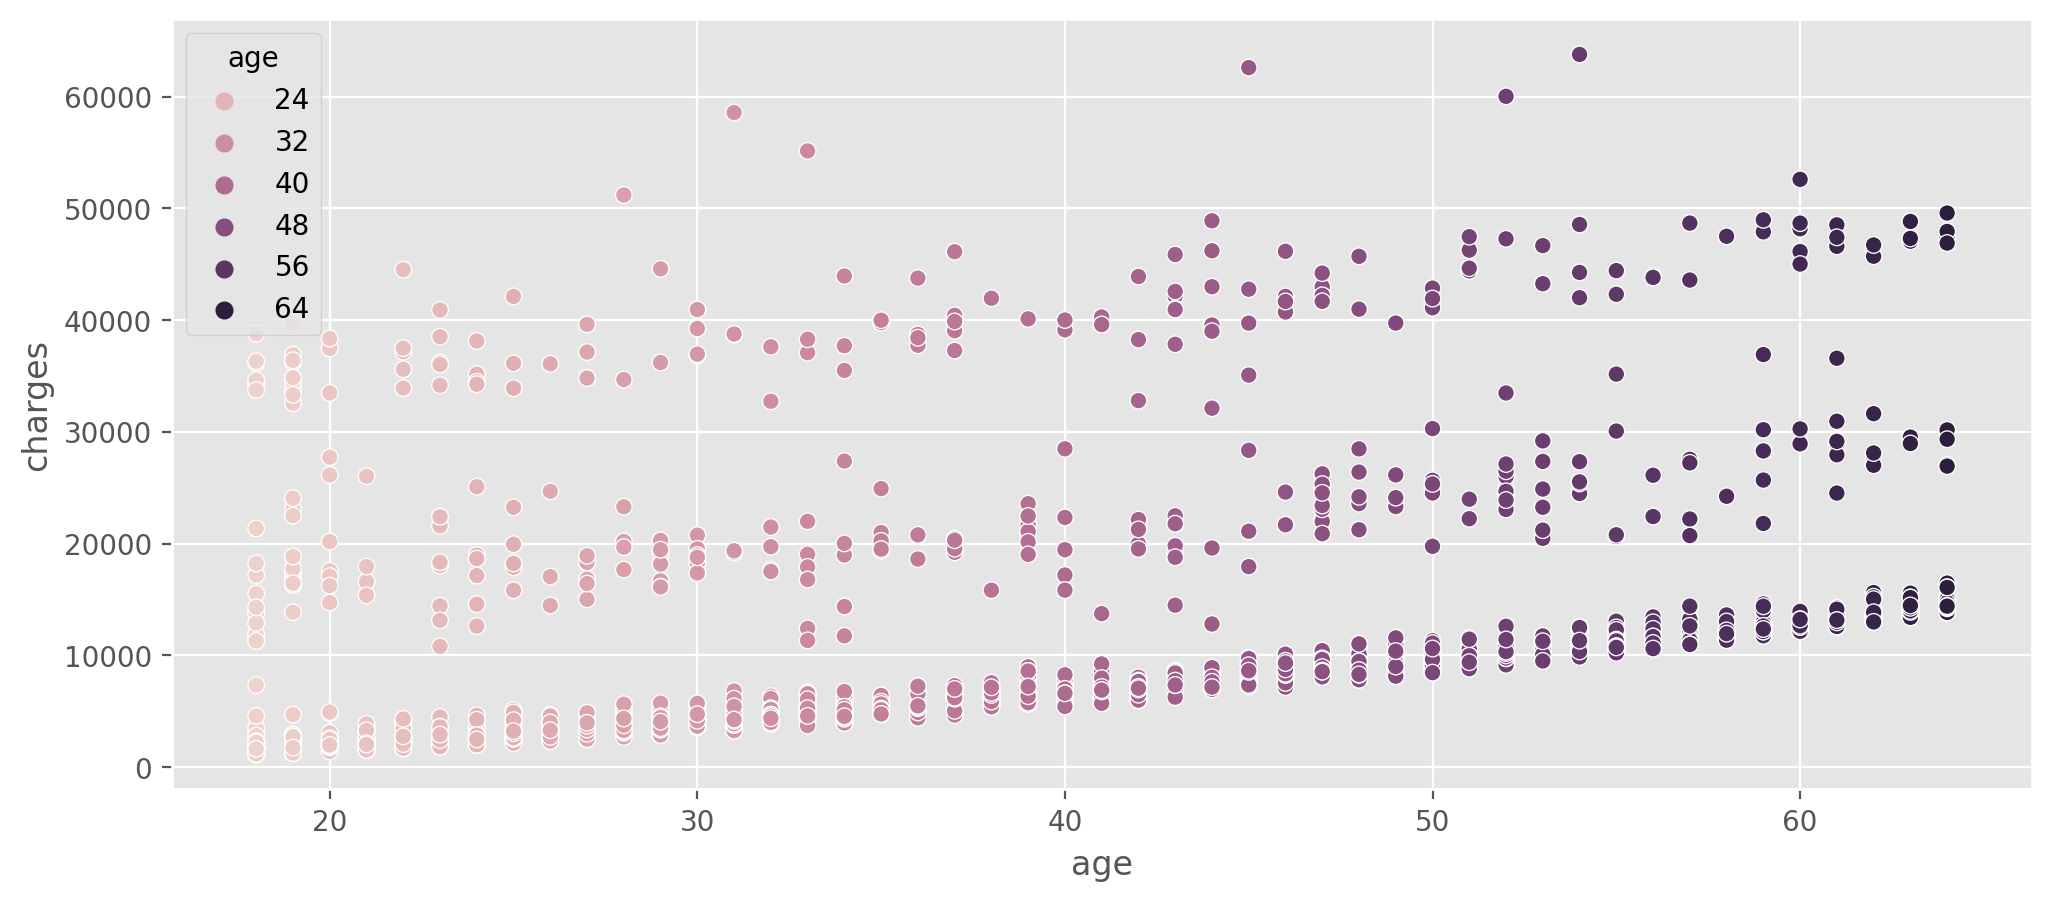

In [11]:
plt.figure(figsize=(12,5), dpi = 200)
sns.scatterplot('age', 'charges', data=data, hue = 'age')

<AxesSubplot:xlabel='age', ylabel='charges'>

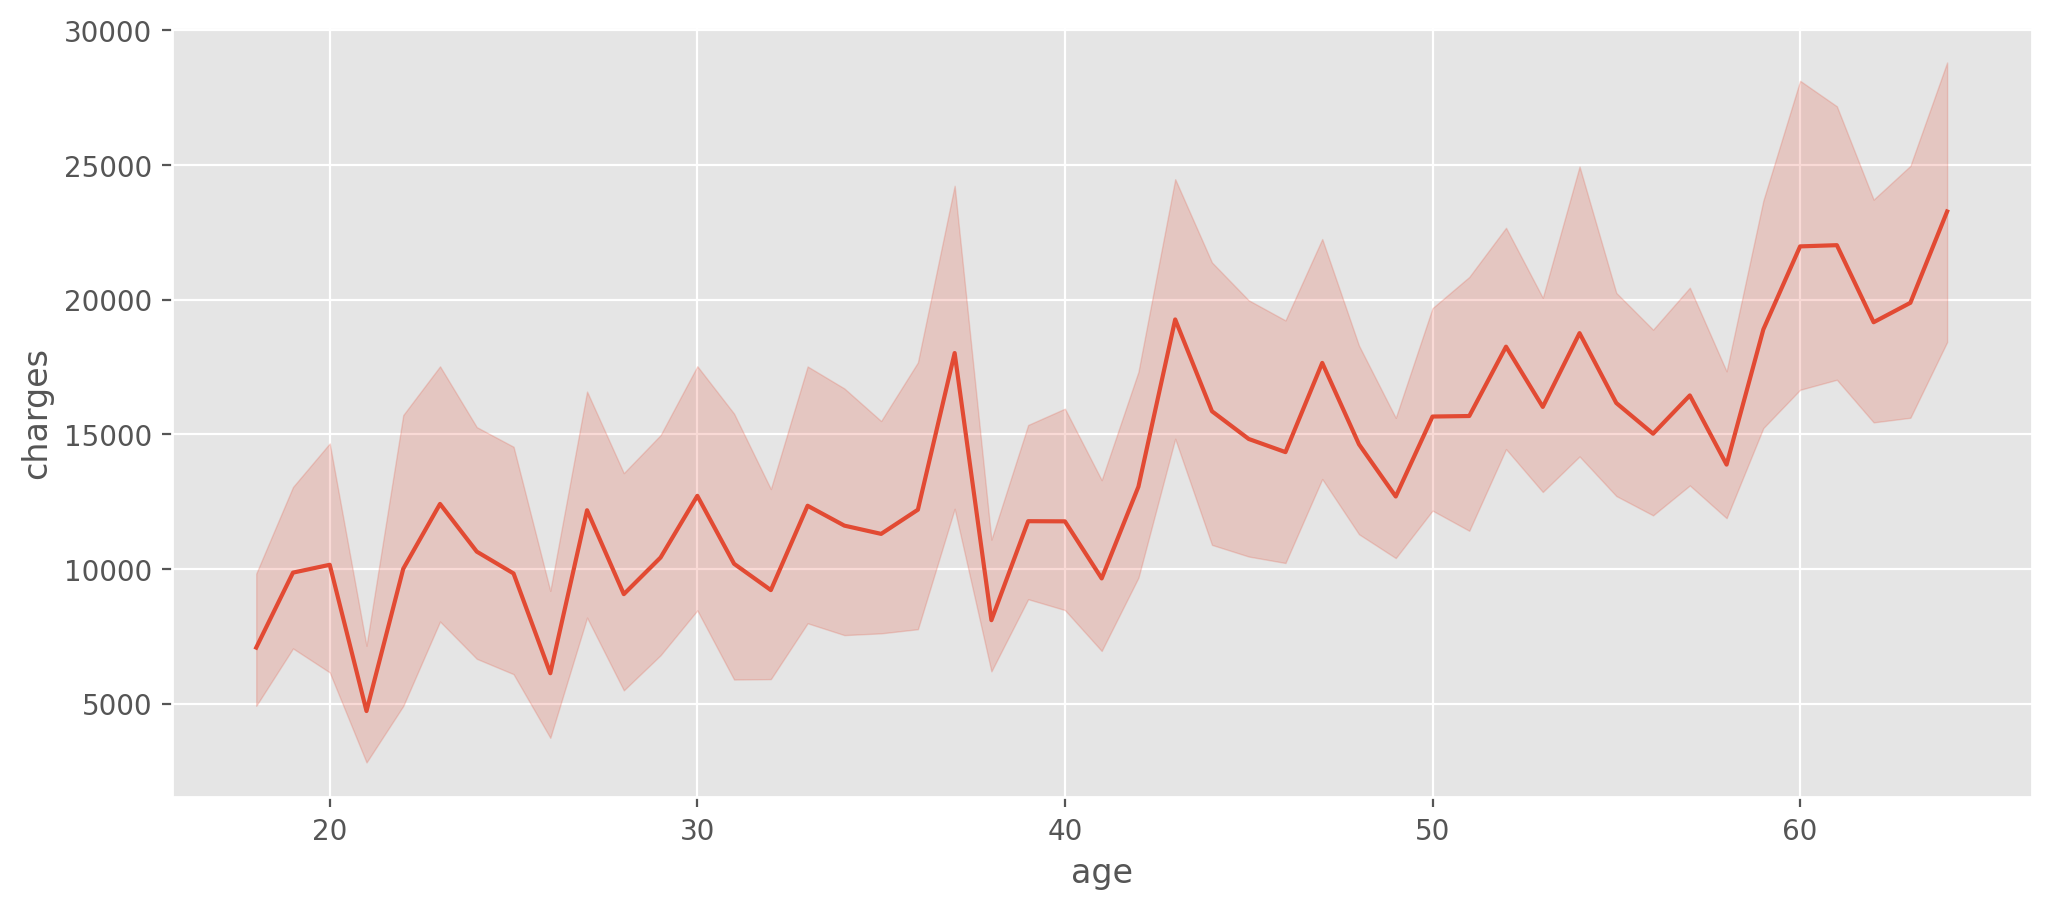

In [12]:
plt.figure(figsize=(12,5), dpi = 200)
sns.lineplot('age', 'charges', data=data)

<AxesSubplot:xlabel='sex', ylabel='charges'>

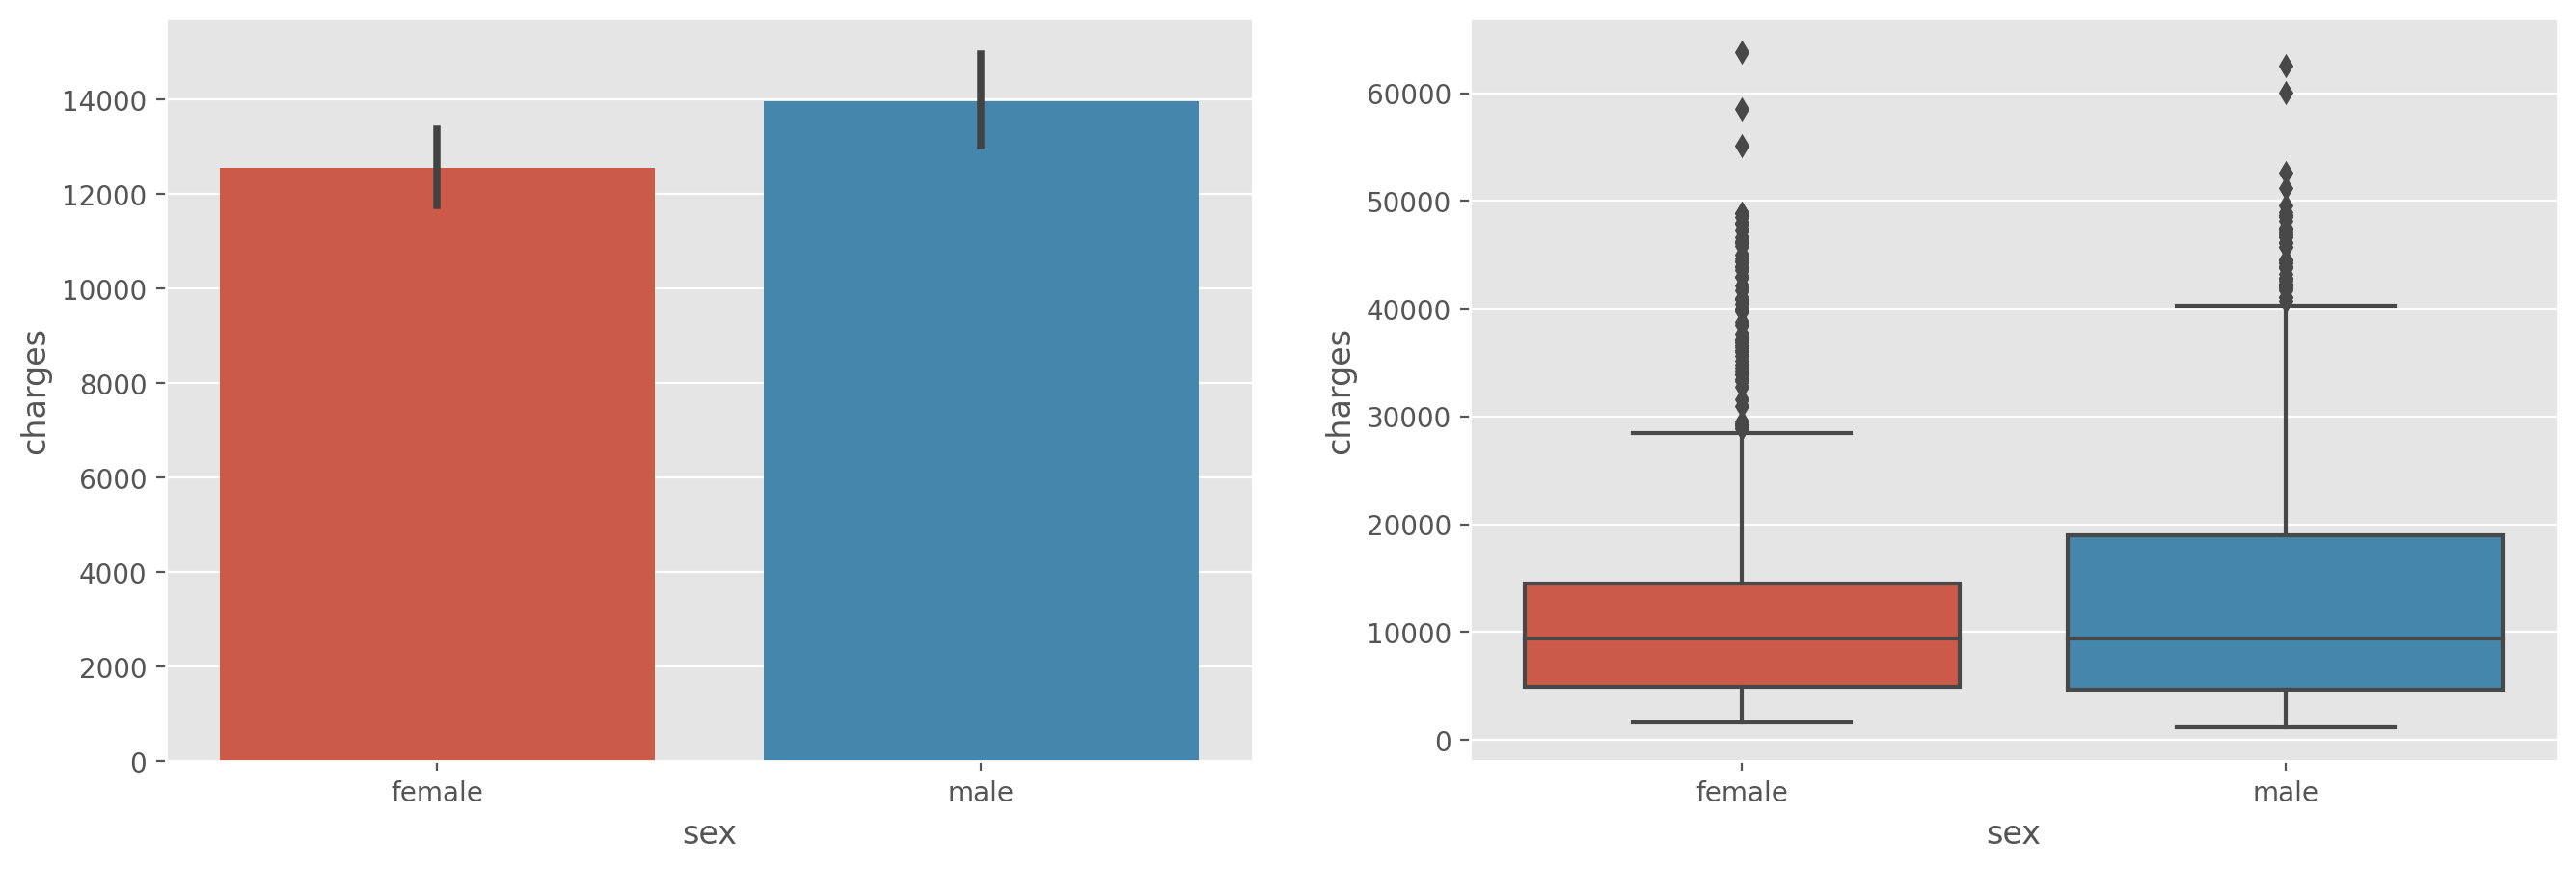

In [13]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('sex', 'charges', data = data)
plt.subplot(1,2,2)
sns.boxplot('sex', 'charges', data = data)

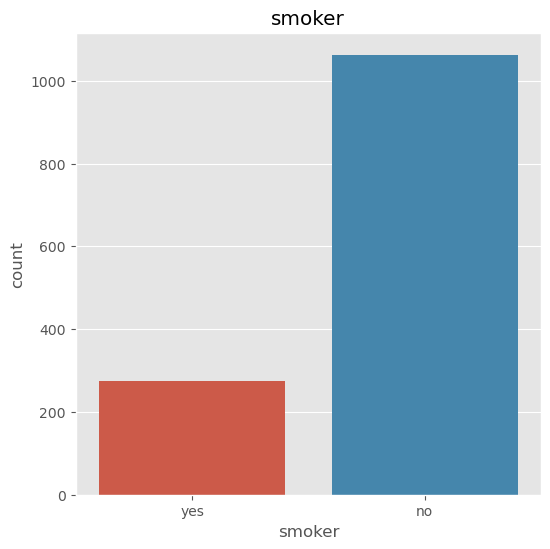

In [21]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='count'>

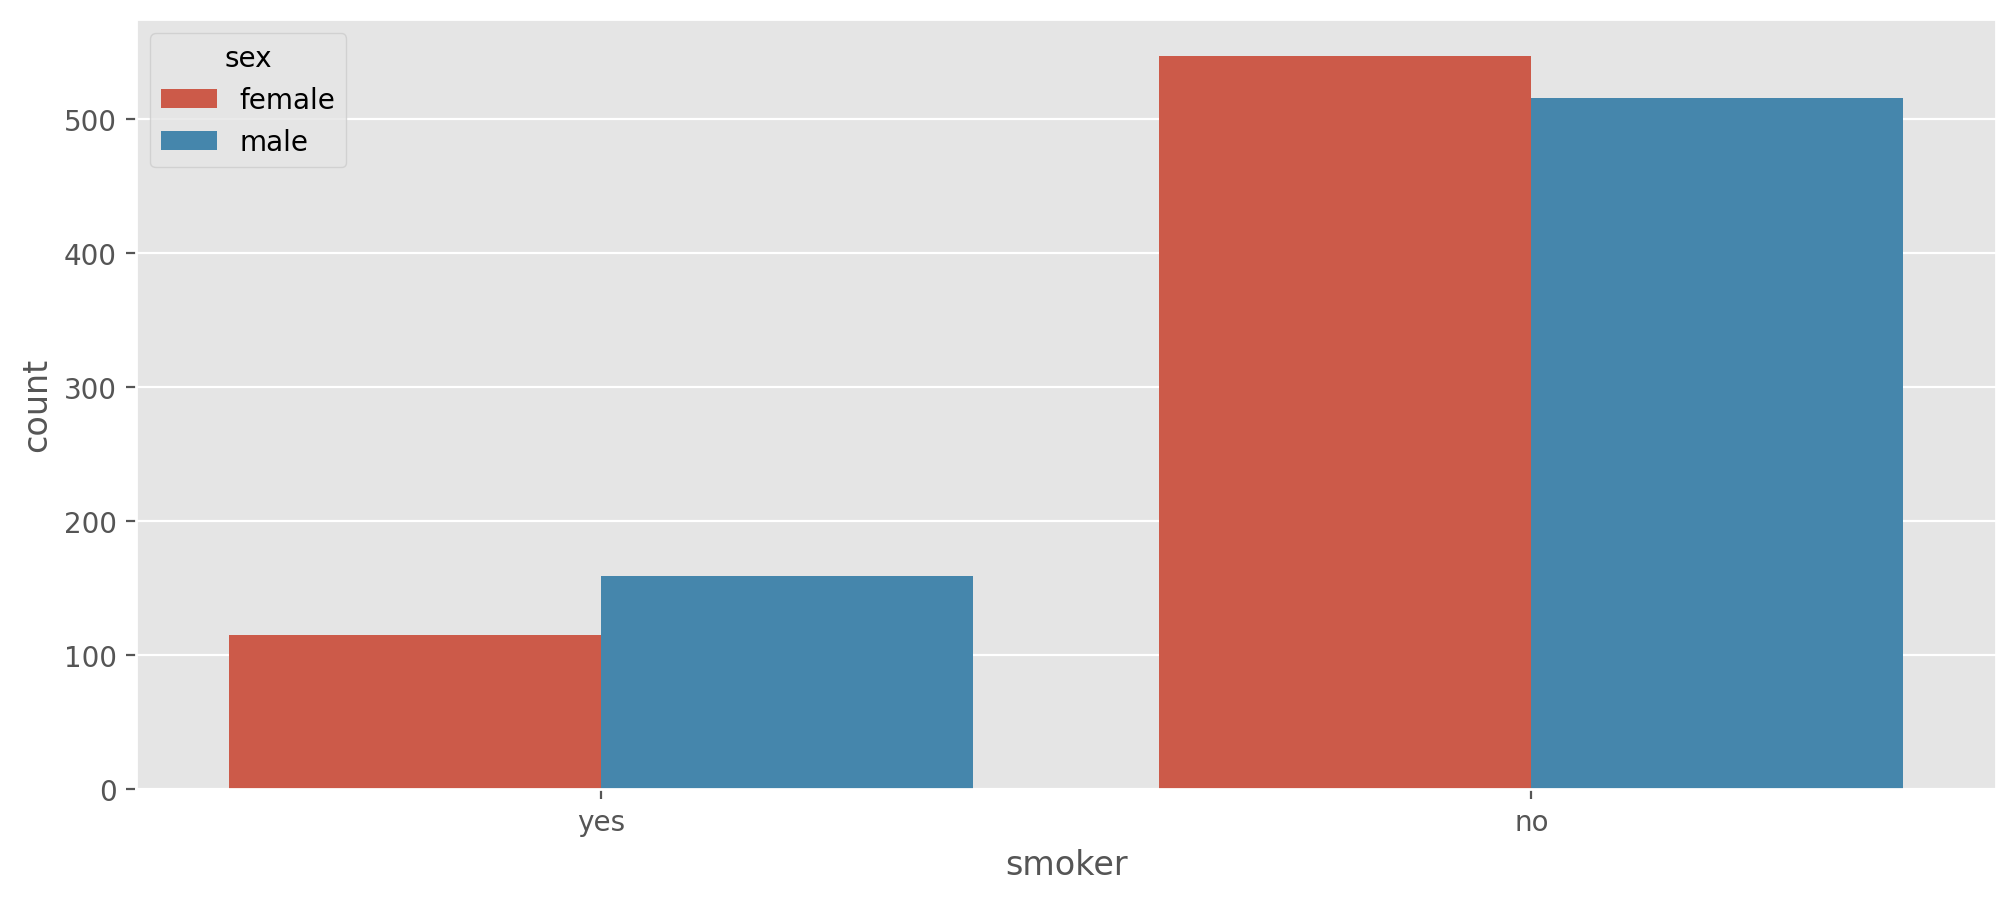

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data['smoker'], hue = data['sex'])

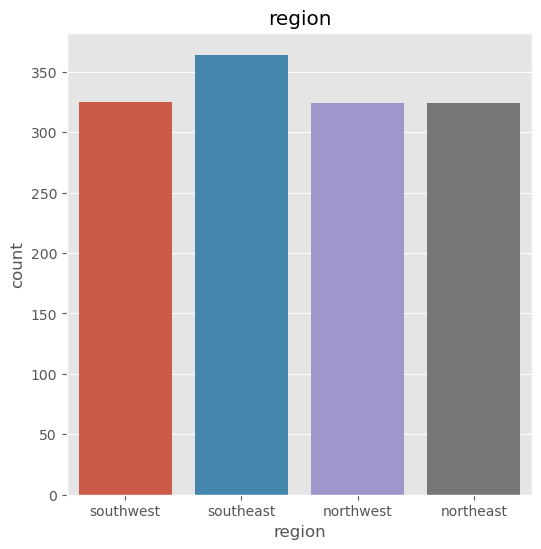

In [22]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

In [24]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

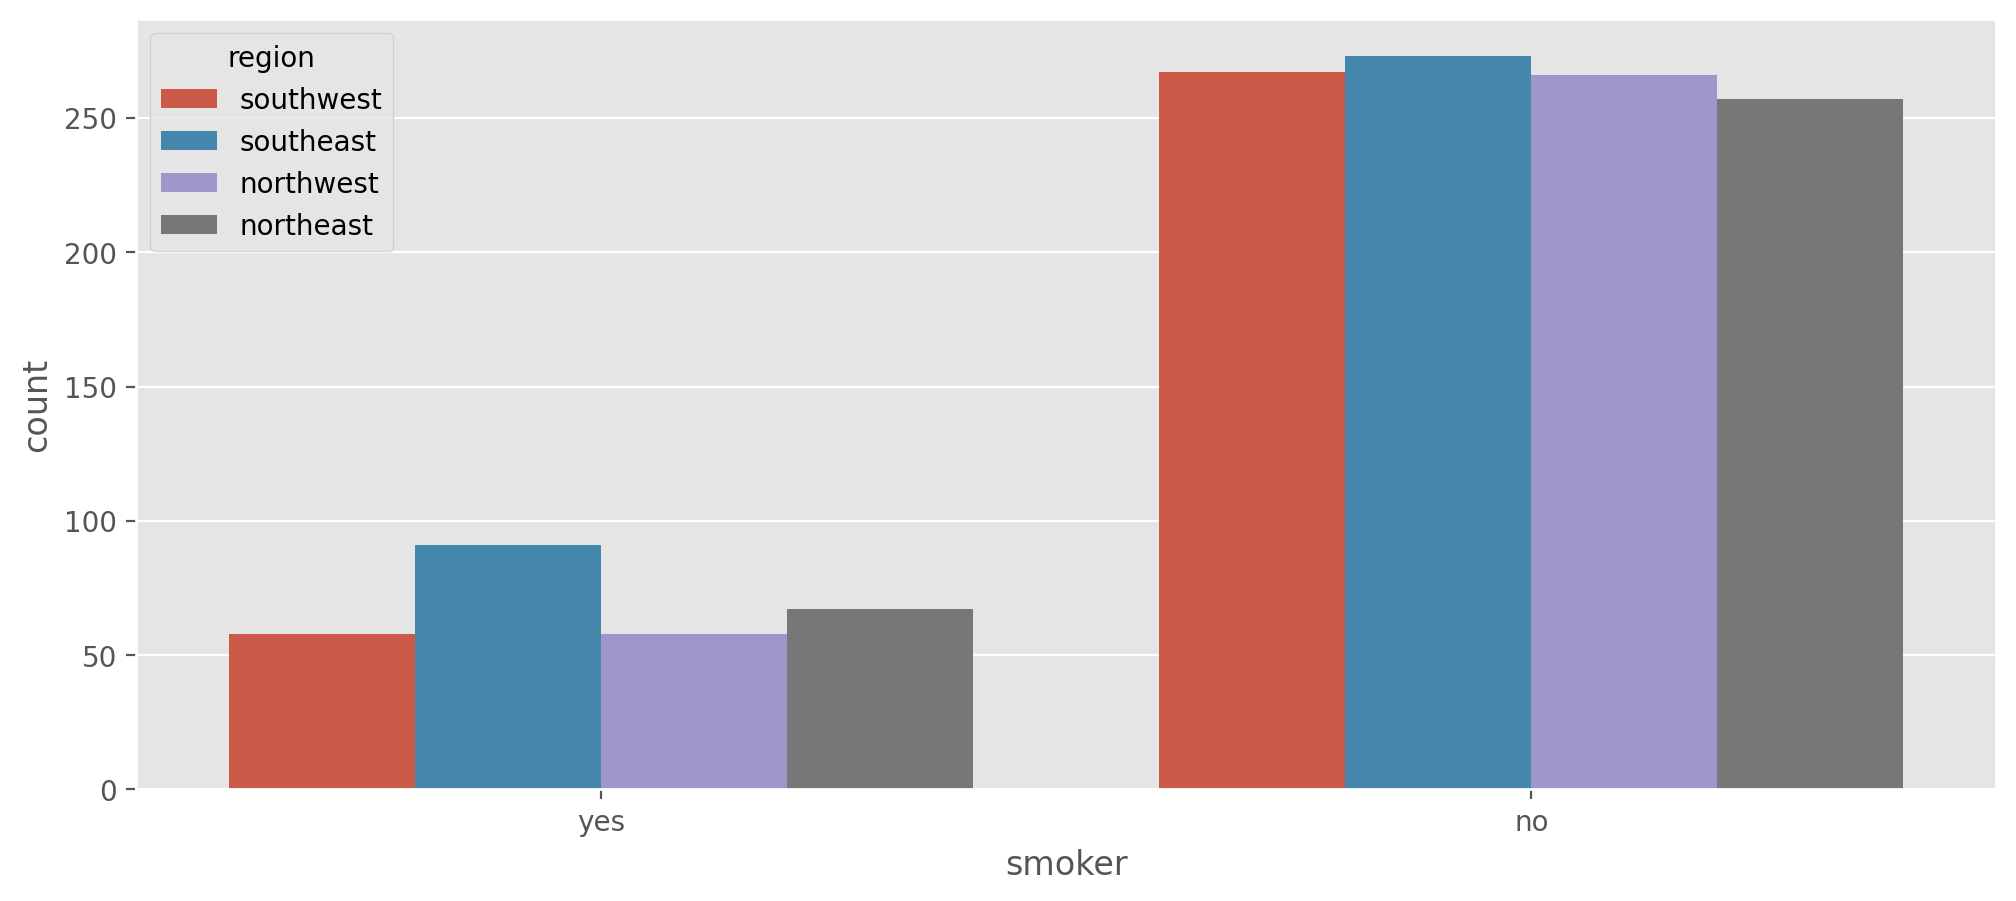

In [16]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data['smoker'], hue = data['region'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

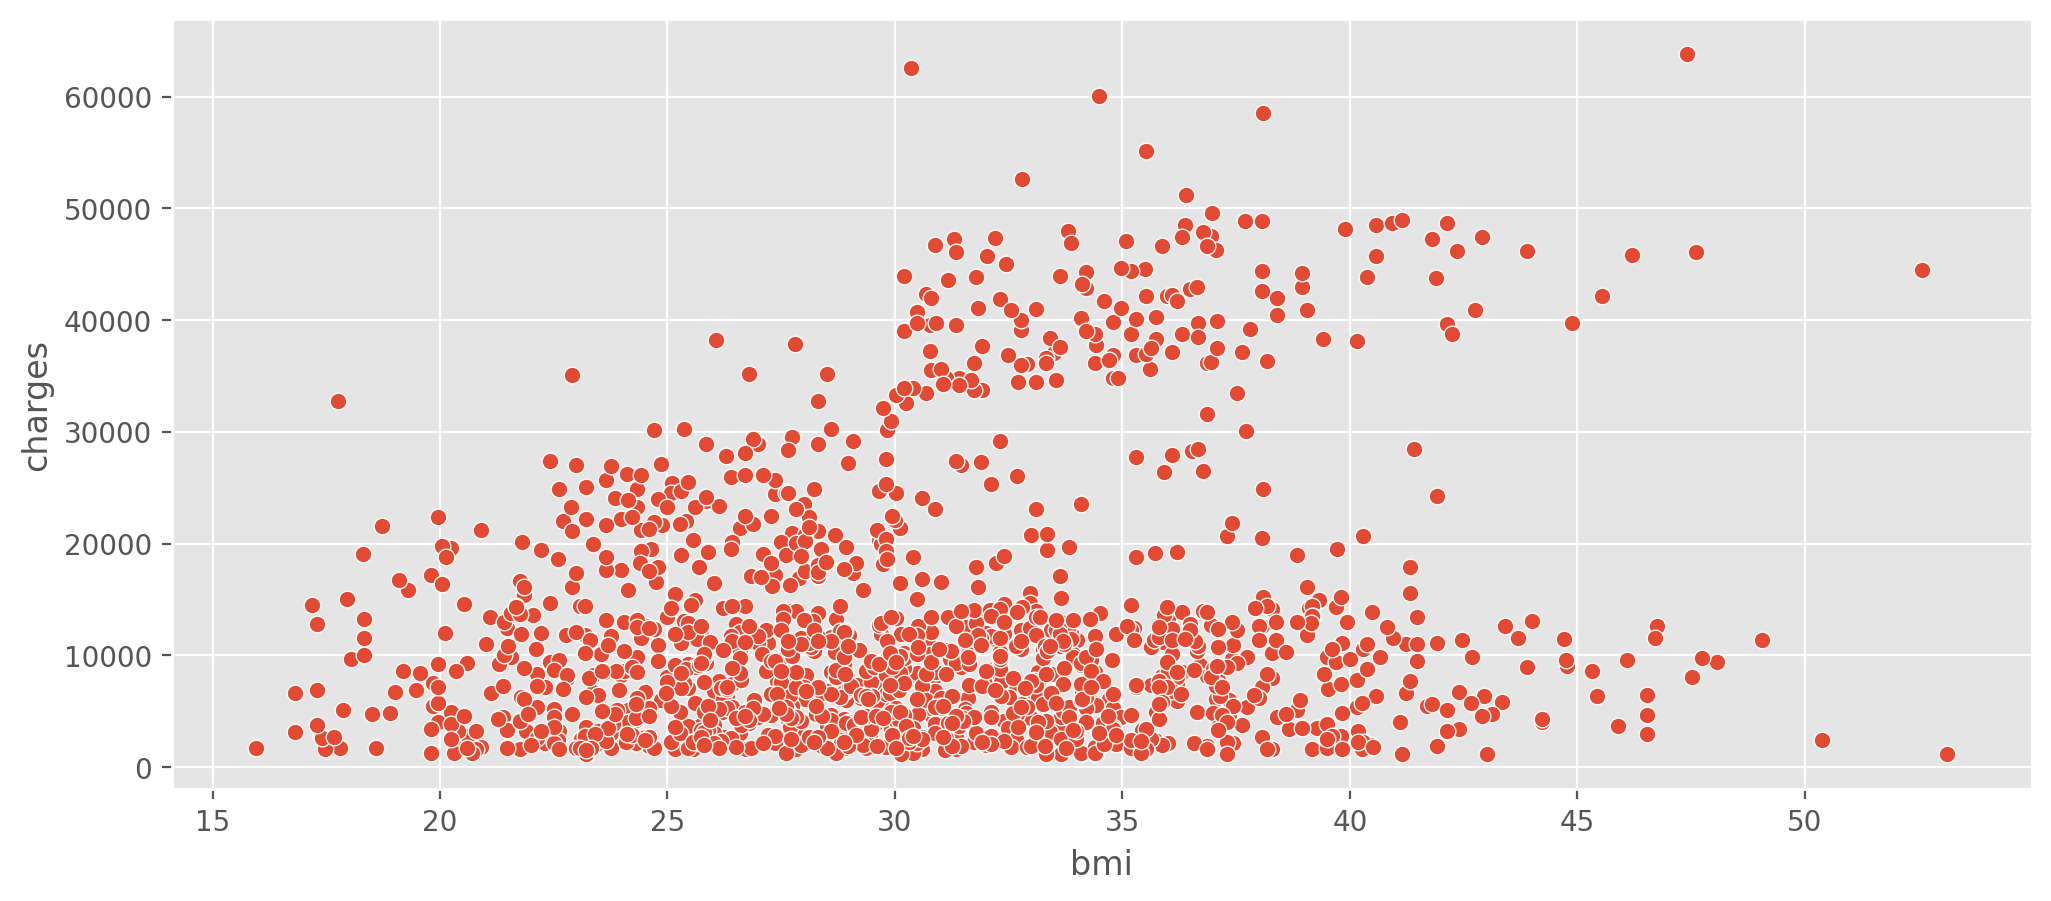

In [17]:
plt.figure(figsize=(12,5), dpi = 200)
sns.scatterplot('bmi', 'charges', data=data)

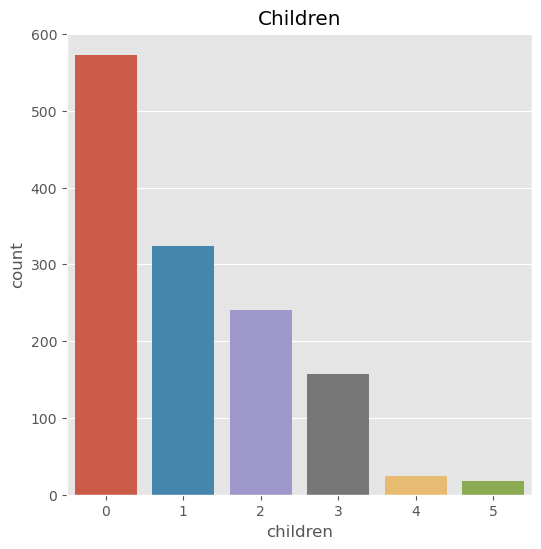

In [19]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

### Encoding the catagorical features

In [30]:
# encoding sex column
data.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

### Splitting the Features and Target

In [37]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [38]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [39]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


### Splitting the data into Training data & Testing Data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


### Model Training 

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation 

In [47]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [53]:
# R squared value
from sklearn.metrics import r2_score
r2_train = r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7575612088793313


In [54]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [55]:
# R squared value
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7207906901003326


###  Building a Predictive System

In [56]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3711.42159026]
The insurance cost is USD  3711.4215902638225
